In [1]:
# Fashion MNIST - 3 Class Image Classification (T-shirt/top, Sneaker, Ankle boot)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Load and Filter the Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Filter only classes 0 (T-shirt/top), 7 (Sneaker), 9 (Ankle boot)
selected_classes = [0, 7, 9]
mask = np.isin(y, selected_classes)
x_filtered = x[mask]
y_filtered = y[mask]

In [4]:
# Map labels to 0, 1, 2
label_map = {0: 0, 7: 1, 9: 2}
y_filtered = np.array([label_map[label] for label in y_filtered])

In [5]:
# Step 2: Preprocess the Data
x_filtered = x_filtered / 255.0
x_filtered = x_filtered.reshape(-1, 28, 28, 1)

In [6]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

In [7]:
# Step 3: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.9229 - loss: 0.2385 - val_accuracy: 0.9738 - val_loss: 0.0689
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.9762 - loss: 0.0686 - val_accuracy: 0.9805 - val_loss: 0.0547
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.9806 - loss: 0.0543 - val_accuracy: 0.9748 - val_loss: 0.0649
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.9805 - loss: 0.0503 - val_accuracy: 0.9817 - val_loss: 0.0522
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.9841 - loss: 0.0418 - val_accuracy: 0.9821 - val_loss: 0.0464
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9851 - loss: 0.0398 - val_accuracy: 0.9829 - val_loss: 0.0436
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9857 - loss: 0.0368 - val_accuracy: 0.9829 - val_loss: 0.0460
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9860 - loss: 0.0363 - 

In [10]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

132/132 - 1s - 8ms/step - accuracy: 0.9848 - loss: 0.0453

Test Accuracy: 0.9847618937492371


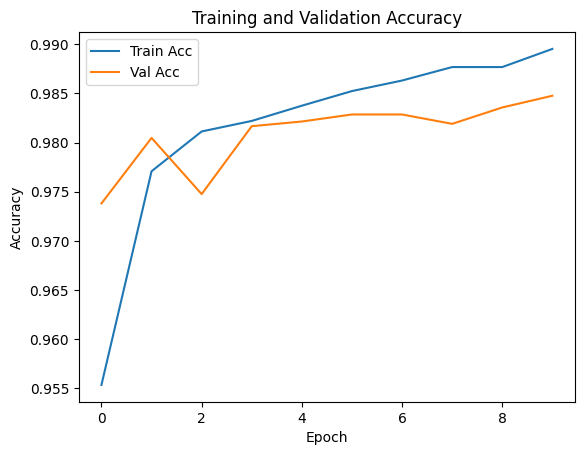

In [11]:
# Step 7: Plot Training History
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


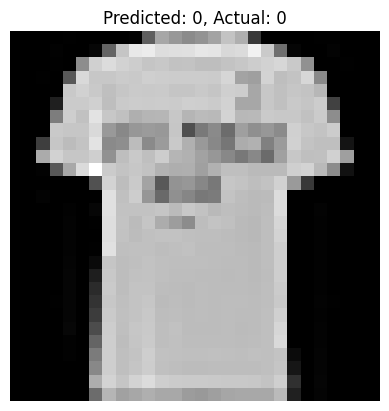

In [16]:
# Step 8: Sample Predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(1):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()